# SUMMARY CHARTS FOR OSEM RUN

OSEM model projects and actively trades a portfolio of corporate bonds and equities in light of commitments. The basic unit in OSEM is a cash flow. The purpose of this script is to show a how different types of cash flows are treated in the latest run.



# Table of Contents  
 1. Loading the summary csv
 
       Equity
        
       Corporate bonds
       
       Cash

       Liability profile
 
 2. The initial portfolio
      
      Periodic cash flows

      Terminal cash flows
      
      Cash movement

      End of period market value

      
 3. Test 1 Return of portfolio
 4. Test 2 no vanishing cash flows

<a id="1"></a> <br>
## Loading the summary csv

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [60]:
out = pd.read_csv("Output/Results.csv",index_col=0, parse_dates=[0])

<a id="2"></a> <br>
## The initial portfolio

This section shows what the initial inputs of the run were. Currently OSEM can handle three types of financial instruments and one type of liability profile.

### Equity

Shares in companies:

In [61]:
equity = pd.read_csv("Input/Equity_Portfolio_test.csv",index_col=0)

In [62]:
display(equity)

,Asset_Type,NACE,Issue_Date,Dividend_Yield,Frequency,Units,Market_Price,Terminal,Default_Probability,Growth_Rate
Asset_ID,,,,,,,,,,
1125,Equity_Share,A1.4.5,3/12/2021,0.03,1,1,94,1,0.03,0.01
2123,Equity_Share,B5.2.0,3/12/2021,0.05,1,1,92,1,0.03,0.02
3232,Equity_Share,B8.9.3,3/12/2019,0.04,1,1,96,1,0.03,0.04
3237,Equity_Share,B8.9.3,3/12/2019,0.04,1,1,96,1,0.03,0.00


### Corporate bonds

Corporate bonds:

In [63]:
bonds = pd.read_csv("Input/Bond_Portfolio_test.csv",index_col=0)

In [64]:
display(bonds)

,Asset_Type,NACE,Issue_Date,Maturity_Date,Notional_Amount,Coupon_Rate,Z_Spread,Frequency,Recovery_Rate,Default_Probability,Units,Market_Price
Asset_ID,,,,,,,,,,,,
1234,Corporate_Bond,A1.4.5,3/12/2021,12/12/2026,100,0.03,0.01,1,0.4,0.03,1,94
2889,Corporate_Bond,B5.2.0,3/12/2021,12/12/2028,100,0.05,0.01,2,0.4,0.03,2,92
31,Corporate_Bond,B8.9.3,3/12/2019,3/12/2025,100,0.04,0.01,12,0.4,0.03,3,96


### Cash

Initial cash position:

In [65]:
cash = pd.read_csv("Input/Cash_Portfolio_test.csv",index_col=0)

In [66]:
display(cash)

,Bank_Account
Asset_ID,
1,10000


### Liability profile

An aggregated view of liabilities displayed as aggregated outflows at future dates:

In [67]:
liability = pd.read_csv("Input/Liability_Cashflow.csv",index_col=0)

In [68]:
display(liability)

,Liability_Size
Liability_Date,
1/9/2023,6
2/10/2023,92
2/11/2023,93
3/12/2023,2
3/1/2024,7
...,...
19/3/2049,14
19/4/2049,28
20/5/2049,53


<a id="3"></a> <br>
## What is in the summary csv

During the OSEM run, pieces of information area saved into the "Summary" dataframe. The object captures the performance of the portfolio and size of cash flows in each step.

***
<span style=color:black>
    <b>SUMMARY OBJECT</b>
</span>
<br>
<span style=color:black>   
    All collumns
</span>

In [69]:
out.head(10)

,Start cash,End cash,Start market value,After growth market value,End market value,Portfolio return,Dividend cash flow,Coupon cash flow,Terminal cash flow,Notional cash flow,Liability cash flow
2023-04-29,NaN,1.000000e+04,NaN,NaN,944.000000,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-28,1.000000e+04,0.000000e+00,944.000000,1131.647758,11094.910085,0.198779,15.262327,167.000000,0.0,0.000000,-219.0
2025-04-28,0.000000e+00,-6.821210e-13,11094.910085,11257.140153,12979.814124,0.014622,152.371222,1637.302749,0.0,0.000000,-67.0
2026-04-28,-6.821210e-13,0.000000e+00,12979.814124,13090.969540,17276.502093,0.008564,178.930021,1345.240337,0.0,3391.362195,-730.0
2027-04-28,0.000000e+00,-5.911716e-12,17276.502093,17395.189415,18978.761104,0.006870,240.546475,343.134796,0.0,1491.890418,-492.0
2028-04-27,-5.911716e-12,-1.136868e-12,18978.761104,19090.621750,18958.562891,0.005894,267.400197,325.540943,0.0,0.000000,-725.0
2029-04-27,-1.136868e-12,-9.094947e-13,18958.562891,19072.185893,22132.001591,0.005993,270.636452,323.289022,0.0,3232.890224,-767.0
2030-04-27,-9.094947e-13,-1.136868e-13,22132.001591,22263.127554,21957.250051,0.005925,320.122497,0.000000,0.0,0.000000,-626.0
2031-04-27,-1.136868e-13,-1.023182e-12,21957.250051,22088.246116,21861.138535,0.005966,321.892419,0.000000,0.0,0.000000,-549.0
2032-04-26,-1.023182e-12,-6.821210e-13,21861.138535,22003.641584,21805.518160,0.006519,324.876576,0.000000,0.0,0.000000,-523.0


***

<a id="4"></a> <br>
### Periodic cash flows

The portfolio generates periodic cash flows from its investment portfolio and outflows from liabilities that the company commited to. Example of recurent inflows are dividends and coupons.


In [70]:
time_axis = out.index[:-1]

div_axis = out["Dividend cash flow"][:-1]
coup_axis = out["Coupon cash flow"][:-1]
liab_axis = out["Liability cash flow"][:-1]

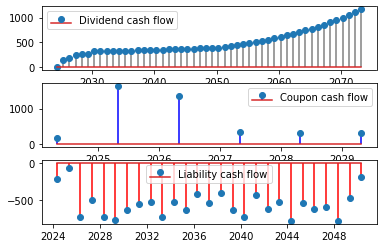

In [71]:
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.stem(time_axis[div_axis>0], div_axis[div_axis>0], linefmt='grey',label='Dividend cash flow')
ax2.stem(time_axis[coup_axis>0], coup_axis[coup_axis>0], linefmt='blue', label="Coupon cash flow")
ax3.stem(time_axis[liab_axis<0], liab_axis[liab_axis<0], linefmt='red', label= "Liability cash flow")

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

### Terminal cash flows

Each asset in OSEM has a terminal value. For fixed income instruments, these are the notional payments at the maturity date, for equitiess, OSEM assumes that the all equity positions are sold at the end of the modelling window at market rates.

In [72]:
not_axis = out["Notional cash flow"]
term_axis = out["Terminal cash flow"]

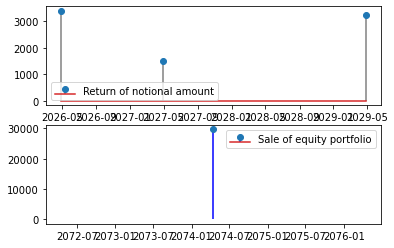

In [73]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.stem(out.index[not_axis>0], not_axis[not_axis>0], linefmt='grey',label='Return of notional amount')
ax2.stem(out.index[term_axis>0], term_axis[term_axis>0], linefmt='blue', label="Sale of equity portfolio")

ax1.legend()
ax2.legend()
plt.show()

#### Cash movement

The manangement of cash between periods is fundamental to OSEM. If the initial cash is high, then in the first period, the large cash position is sold in line with the asset allocation rule. This is why the initial cash is represented separately. After the first period, cash swings as the ballance of inflows/outflows changes through time.

In [74]:
x_axis = out.index
end_cash_axis = out["End cash"]
start_cash_axis = out["Start cash"]

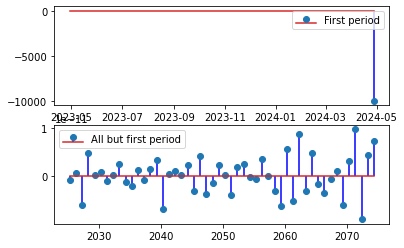

In [75]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(x_axis[0:2], end_cash_axis[0:2]-start_cash_axis[0:2], linefmt='b', label='First period')
ax2.stem(x_axis[2:], end_cash_axis[2:]-start_cash_axis[2:], linefmt='b', label='All but first period')

ax1.legend()
ax2.legend()
plt.show()

#### End of period market value

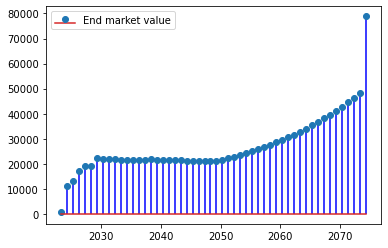

In [76]:
start_mv_axis = out["After growth market value"]
end_mv_axis = out["End market value"]

fig, ax = plt.subplots(1)
ax.stem(out.index, end_mv_axis, linefmt='b' , label='End market value')
ax.legend()
plt.show()

## Test 1 Return of portfolio

The purpose of this test is to verify if the reported return of the porfolio is equal to the increase/decrease of the total market value of the porfolio.

In [77]:
return_calculated = (out["After growth market value"]/out['Start market value']-1)[1:]

In [78]:
test_1 = out["Portfolio return"][1:]-return_calculated

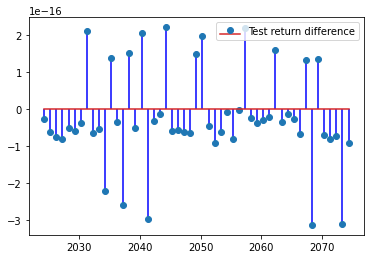

In [79]:
fig, ax = plt.subplots(1)
ax.stem(out.index[1:], test_1,linefmt='b' , label='Test return difference')
ax.legend()
plt.show()

## Test 2 no vanishing cash flows

The purpose of this test is to verify if the inflows and outflows balance at every period. This test shows that all types of cash flows are accounted correctly and there is no "leakage".


Starting values are

 * Start cash
 * After growth market value

Cash flows occuring during the period and accumulating inside the bank account are
 * Coupon payments
 * Dividend payments
 * Notional payments of fixed income assets
 * Terminal value sales


The end values are:
 * End cash value
 * End market value

The test performs the following check

$$
C^{start}_i + MV^{ag}_i + CF^a_i - CF^l_i = C^{end}_i + MV^{end}_i 
$$

Where:
$$
CF^a_i := div_i + coup_i + not_i + term_i
$$

And:
 * $i$ is the calculation period
 * $C^{start}_i$ is the initial cash position
 * $MV^{ag}_i$ is the market value after portfolio growth but before any trading
 * $CF^l_i$ are the accumulated outflows from company's commitments
 * $C^{end}_i$ is the final cash position
 * $MV^{end}_i$ is the final market value of the portfolio
 * $div_i$ is the accumulated dividend inflows
 * $coup_i$ is the accumulated coupon inflows
 * $not_i$ is the accumulated inflows from matured fixed income instruments (bonds)
 * $term_i$ is the accumulated inflows from equity positions sold at the end of the modelling window
 
Note that the asset growth occurs before trading therefore, "Cash after growth" is used as the starting value

In [80]:
cf_assets = coup_axis+div_axis+not_axis[:-1]+term_axis[:-1]

test_2 = start_cash_axis + start_mv_axis + cf_assets + liab_axis - end_mv_axis - end_cash_axis

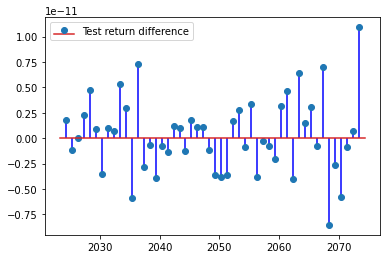

In [81]:
fig, ax = plt.subplots(1)
ax.stem(x_axis, test_2,linefmt='b' , label='Test return difference')
ax.legend()
plt.show()